# CS4035 - Cyber Data Analytics
## Lab 4

### Submit on brightspace (zip file with the name Group_xx.zip)
This jupyter file completed with code, plots, figures and report for each question. Write the code or explanation below each sub question. For the explanations, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.

(if you used hard-to-get libraries) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 

## Group Number :

## Student 1 
### Name :
### ID :

## Student 2
### Name :
### ID :

## README

Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

## 1. Preparation (0 points)

### 1a. Load the dataset and split it into a train and test set

In [148]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [9]:
data = np.load("X.npy")
label = np.load("y.npy")
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)
X_train = X_train[:2500]
X_test = X_test[:2500]
y_train = y_train[:2500]
y_test = y_test[:2500]

In [27]:
model = SGDClassifier(loss='log_loss')
model.partial_fit(X_train, y_train, classes=np.unique(y_train))
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.874

## 2. Attacking linear models (5 Points)

### 2a. Implementing useless import attacks


In [145]:
def evade(sample, coef, n_libraries=10):
    library_indices = np.where(sample == 1)[0].tolist()
    neg_coef = np.random.permutation(np.where(coef[0] <  0))[0]
    sample_neg_coef = np.random.choice(neg_coef, n_libraries)
    library_indices.extend(sample_neg_coef.tolist())
    
    new_row = np.zeros(coef.shape[1])
    new_row[library_indices] = 1
    return new_row

In [107]:
malicious_samples = X_train[np.where(y_train == 1)]
coefficients = model.coef_

In [69]:
coefficients[0]

array([-26.3125995 ,   6.00788135, -14.01284567, ...,   0.        ,
         0.        ,   0.        ])

In [152]:
changes = []
for n in range(10, 500, 10):
    print(f"Adding {n} libraries")
    changed_prediction = 0
    for sample in malicious_samples:
        prediction  = model.predict([sample])[0]
        new_data = evade(sample, coefficients, n_libraries=n)
        evaded_prediction = model.predict([new_data])[0]
        changed_prediction += evaded_prediction != prediction
    print(f"Evaded {changed_prediction} detections\n")
    changes.append(changed_prediction/len(malicious_samples))

Adding 10 libraries
Evaded 77 detections

Adding 20 libraries
Evaded 176 detections

Adding 30 libraries
Evaded 253 detections

Adding 40 libraries
Evaded 365 detections

Adding 50 libraries
Evaded 450 detections

Adding 60 libraries
Evaded 567 detections

Adding 70 libraries
Evaded 632 detections

Adding 80 libraries
Evaded 697 detections

Adding 90 libraries
Evaded 775 detections

Adding 100 libraries
Evaded 830 detections

Adding 110 libraries
Evaded 858 detections

Adding 120 libraries
Evaded 887 detections

Adding 130 libraries
Evaded 896 detections

Adding 140 libraries
Evaded 908 detections

Adding 150 libraries
Evaded 908 detections

Adding 160 libraries
Evaded 915 detections

Adding 170 libraries
Evaded 918 detections

Adding 180 libraries
Evaded 919 detections

Adding 190 libraries
Evaded 922 detections

Adding 200 libraries
Evaded 925 detections

Adding 210 libraries
Evaded 925 detections

Adding 220 libraries
Evaded 925 detections

Adding 230 libraries
Evaded 928 detections

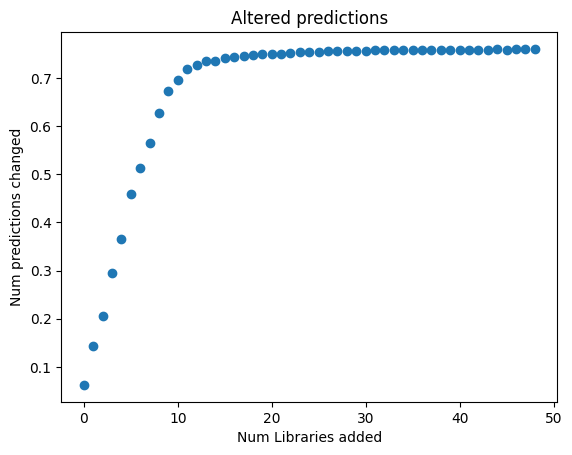

In [153]:
plt.plot(range(len(changes)), changes, 'o')
plt.title("Altered predictions")
plt.xlabel("Num Libraries added")
plt.ylabel("Num predictions changed")
plt.show()

In [150]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.874

In [172]:
X_test_evaded = []
for sample in X_test:
    evaded_sample = evade(sample, coefficients, n_libraries=250)
    X_test_evaded.append(evaded_sample)
y_pred = model.predict(X_test_evaded)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.4944

In [199]:
batch_size = 64

In [200]:
X_train_batch = np.array_split(X_train, len(X_train)//batch_size)
y_train_batch = np.array_split(y_train, len(y_train)//batch_size)

In [201]:
model = SGDClassifier(loss='log_loss', random_state=42)

for x, y in zip(X_train_batch, y_train_batch):
    model.partial_fit(x, y, classes=np.unique(y_train))
    

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8568

### 2b. Analysis and answers to the questions

## 3. Improving robustness by hardening (5 Points)

### 3a. Implementing hardening

### 3b. Analysis and answers to the questions

## 4. Training non-negative linear models (5 Points)

### 4a. Implement non-negative logistic regression using SGD

### 4b. Analysis and answers to the questions.

## 5. Bonus: robust decision trees for fraud detection (5 Points)

### 5a. Train and analyze a regular decision tree for fraud detection

### 5b. Train and analyze a robust decision tree (GROOT) for fraud detection

### 5c. Evaluate the robustness of the two models